apt update
apt install -y build-essential

apt install git-all
git config --global user.email "jeongho.jang0404@gmail.com"
git config --global user.name "JeonghoJang"

mkdir my-volume
cd my-volume

git clone https://github.com/Je0ngh0/samsung-qreport-rag.git
cd samsung-qreport-rag

wget -qO- https://astral.sh/uv/install.sh | sh

uv venv --python 3.12 --seed
source .venv/bin/activate

pip install jupyter ipywidgets jupyterlab_widgets
pip install notebook
pip install langchain
pip install langchain-community
pip install langchain-experimental
pip install -qU langchain-huggingface
pip install sentence-transformers
pip install bitsandbytes
pip install accelerate
pip install matplotlib
pip install pdf2image Pillow

touch .env

export $(cat .env | xargs -d '\n')

In [3]:
from pdf2image import convert_from_path

images = convert_from_path(
    "input.pdf",
    dpi=300,
    first_page=163,  # 시작 페이지 (1-based)
    last_page=163,   # 끝 페이지 (포함)
    fmt="png"
)

for i, img in enumerate(images, start=5):
    img.save(f"page_{i}.png")

PDFPageCountError: Unable to get page count.
I/O Error: Couldn't open file 'input.pdf': No such file or directory.


In [30]:
from pdf2image import convert_from_path

file_path = "./data/raw/[삼성전자]분기보고서(2025.05.15).pdf"
pages_to_get = {1, 3, 10} 


first_page = 296
last_page = first_page

images = convert_from_path(
    file_path,
    dpi=512,
    first_page=first_page,  # 시작 페이지 (1-based)
    last_page=last_page,   # 끝 페이지 (포함)
    fmt="png"
    )

for i, img in enumerate(images, start=first_page):
    img.save(f"page_{i}.png")

In [8]:
! ls -a

.          .env       .gitignore data       memo.ipynb page_6.png page_8.png
..         .git       README.md  indexing   page_5.png page_7.png venv


In [1]:
print("hi")

hi


In [1]:
from transformers import AutoTokenizer

In [ ]:
qwen3_embedding_8b

In [ ]:
import json

# 1. 기존 JSON 파일 읽기
with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 2. 새로운 데이터 추가
# 기존 데이터가 list 형태라면 append
if isinstance(data, list):
    data.append({"name": "홍길동", "age": 30})
# 기존 데이터가 dict 형태라면 key-value 추가
elif isinstance(data, dict):
    data["new_user"] = {"name": "홍길동", "age": 30}

# 3. 다시 저장 (기존 파일 덮어쓰기)
with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

print("데이터가 추가되었습니다!")

In [21]:
import json
from langchain_core.documents import Document

with open("./data/parsed/pdfplumber.json", "r", encoding="utf-8") as f:
    docs_dict = json.load(f) 

docs = [Document(**d) for d in docs_dict]

In [27]:
print(docs[160].page_content)

기업회 기업회 기업회
계기준 계기준 계기준
서 제 서 제 서 제
1024 1024 1024
Harm 호 특 호 특 호 특
an 수관계 수관계 수관계
Intern 자 범 자 범 자 범
ationa 위에 위에 위에
l 포함되 포함되 포함되
Indust 지 않 지 않 지 않
ries, 으나「 으나「 으나「
특수관
Inc. 독점규 독점규 독점규
계의
및 그 제 및 제 및 제 및
성격에
종속기 공정거 공정거 공정거
대한
업이 래에 래에 래에
기술
포함된 관한 관한 관한
중간지 법률」 법률」 법률」
배기업 에 따 에 따 에 따
과의 른 동 른 동 른 동
거래 일한 일한 일한
금액입 대규모 대규모 대규모
니다. 기업집 기업집 기업집
단 소 단 소 단 소
속회사 속회사 속회사
입니다 입니다 입니다
. . .
전분기 (단위 : 백만원)
전체 특수관계자
특수관계자
그 밖의 특수관
종속기업 관계기업 및 공동기업 대규모기업집단
계자
Sams Sams
Sams
ung ung Sams
Sams Sams ung Sams Shang
Electr Electr Sams Sams ung Sams Sams
Sams Sams ung ung Sams Electr ung hai Sams Sams Thai
Sams Sams onics onics ung ung Electr ung ung
ung ung (Chin (CHIN ung onics Eletro Sams ung ung Sams Sams Sams Sams
ung ung Vietna Europ Electr Displa onics Electr Electr 기타 기타 기타
Electr Austin Harm a) A) India HCMC nica ung Electr Electr ung ung ung ung
삼성디 Asia Semic m e onics y Europ onics onics 삼성에 삼성 관계기 그 밖 삼성이 대규모
onics Semic an과 Semic Invest Electr CE da Semic onics onics Intern Electr 

In [8]:
from transformers import AutoTokenizer

MODEL_ID = "Qwen/Qwen3-Embedding-8B"

tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, padding_side="left")

texts = [doc.page_content for doc in docs]

# truncation=True로 설정하면 모델 컨텍스트(32k) 초과분은 잘립니다.
enc = tokenizer(
    texts,
    padding=False,        # 배치 토큰 합산이 아니라 각 문장 실제 토큰 수를 보려면 False
    truncation=True,
    return_attention_mask=False,
    add_special_tokens=True,  # [BOS]/[EOS] 등 모델이 기대하는 스페셜 토큰 포함
)

# 각 입력의 실제 토큰 수
token_counts = [len(ids) for ids in enc["input_ids"]]
total_tokens = sum(token_counts)

print("per-text tokens:", token_counts)
print("total tokens:", total_tokens)

per-text tokens: [741, 821, 580, 235, 24, 266, 493, 879, 413, 733, 703, 492, 505, 943, 828, 330, 517, 577, 247, 383, 464, 339, 344, 440, 431, 215, 721, 507, 528, 347, 15, 636, 680, 528, 371, 496, 633, 692, 607, 693, 720, 601, 519, 364, 570, 517, 280, 483, 602, 330, 563, 701, 340, 1062, 1455, 1236, 1081, 1206, 1279, 1301, 1110, 884, 780, 725, 646, 674, 707, 719, 717, 1165, 1267, 1166, 932, 1173, 1024, 709, 1198, 996, 1161, 1333, 953, 1161, 524, 881, 882, 605, 630, 898, 317, 459, 701, 528, 562, 724, 580, 640, 563, 543, 705, 618, 610, 628, 1336, 579, 887, 1337, 839, 1097, 620, 674, 577, 1002, 1258, 853, 1424, 707, 414, 400, 624, 557, 1143, 1155, 1267, 969, 909, 1062, 834, 2449, 828, 918, 506, 559, 487, 510, 580, 847, 558, 504, 557, 634, 517, 407, 753, 619, 495, 645, 753, 617, 607, 683, 1224, 577, 965, 1049, 415, 987, 472, 549, 699, 1398, 1181, 883, 582, 3032, 1168, 2363, 804, 472, 448, 540, 380, 810, 717, 549, 560, 753, 57, 491, 172, 1901, 1006, 798, 594, 391, 1047, 275, 791, 434, 673, 50

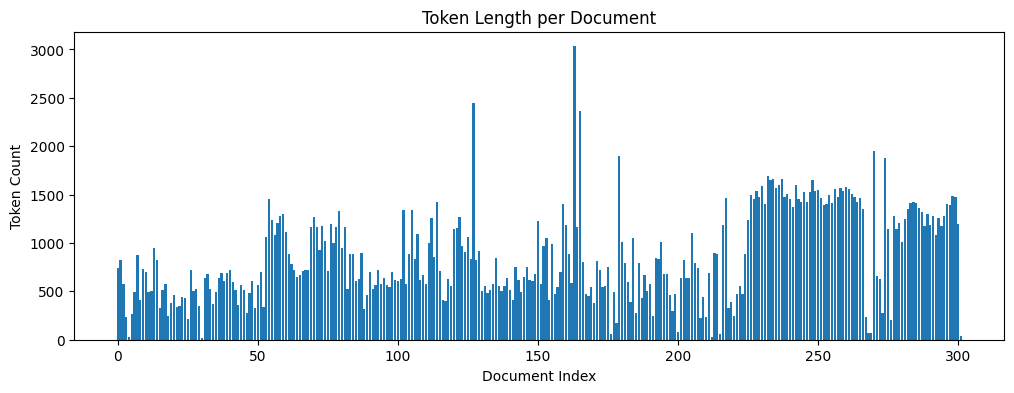

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.bar(range(len(token_counts)), token_counts)
plt.xlabel("Document Index")     # 문서 인덱스
plt.ylabel("Token Count")        # 토큰 수
plt.title("Token Length per Document")  # 문서별 토큰 길이
plt.show()

In [11]:
import matplotlib as mpl

print(mpl.matplotlib_fname())

/Users/jeongho/git/samsung-qreport-rag/venv/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc


### 특수관계자

| 구분 | 종속기업 | 관계기업 및 공동기업 | 그 밖의 특수관계자 | 대규모기업집단 |
|------|----------|----------------------|--------------------|----------------|
| 매출 등, 특수관계자거래 | 51,794,992 | 371,307 | 150,404 | 57,270 |
| 비유동자산 처분, 특수관계자거래 | 7,939 | 185 | 0 | 0 |
| 매입 등, 특수관계자거래 | 25,571,388 | 1,091,365 | 191,985 | 135,564 |
| 비유동자산 매입, 특수관계자거래 | 5,701 | 84,403 | 1,002,295 | 816,495 |

> 기업회계기준서 제1024호 특수관계자 범위에 포함되지 않으나 「독점규제 및 공정거래에 관한 법률」에 따른 동일한 대규모기업집단 소속회사임입니다.

(단위 : 백만원)

---

### 전분기

| 구분 | 종속기업 | 관계기업 및 공동기업 | 그 밖의 특수관계자 | 대규모기업집단 |
|------|----------|----------------------|--------------------|----------------|
| 매출 등, 특수관계자거래 | 52,673,213 | 321,315 | 132,128 | 51,135 |
| 비유동자산 처분, 특수관계자거래 | 16,244 | 122 | 0 | 0 |
| 매입 등, 특수관계자거래 | 25,294,767 | 1,166,884 | 204,415 | 164,070 |
| 비유동자산 매입, 특수관계자거래 | 5,191 | 66,542 | 1,080,956 | 614,082 |

> 기업회계기준서 제1024호 특수관계자 범위에 포함되지 않으나 「독점규제 및 공정거래에 관한 법률」에 따른 동일한 대규모기업집단 소속회사임입니다.

기업회계기준서 제1024호 특수관계자 범위에 포함되지 않으나 「독점규제 및 공정거래에 관한 법률」에 따른 동일한 대규모기업집단 소속회사입니다.

전분기 (단위 : 백만원)

| 전체 특수관계자 | 특수관계자 | 종속기업 | 관계기업 및 공동기업 | 그 밖의 특수관계자 | 대규모기업집단 |
|----------------|-----------|----------|----------------------|--------------------|----------------|
| 삼성전자 Austin | Harman | 삼성전자(China) | 삼성전자(CHINA) | 삼성전자 India | HCMC Vietnam | Samsung Electronics CE Europe | 삼성전자 Mexico | Benelux | 삼성SDI(주) | 삼성디스플레이(주) | 삼성전기(주) | 세메스(주) | 삼성물산(주) | 제일기획(주) | 에스원(주) | ... | ... |
| 매출 등, 특수관계자거래 | 5,751,594 | 7,779,844 | 95,163 | 6,333,302 | 1,567,406 | 797,606 | 883,124 | 445,397 | 282,979 | 191,197 | 1,097,478 | 7,166,624 | 455,976 | 1,465,464 | 877,062 | 1,268,209 | 77,033 | 1,095,509 | 546,129 | 316,092 | 14,177,349 | 63,611 | 26,334 | 27,414 | 32,883 | 171,073 | 126,490 | 50,188 |